In [60]:
from HeaderP import *

from scipy.ndimage import gaussian_filter1d
from scipy.fft import fft, fftfreq
from scipy.signal import savgol_filter
from astropy.timeseries import LombScargle



# only churnning

In [21]:
# set churnning strength assuming diffusion
def σ(τ,D):
    return np.sqrt(τ)*np.sqrt(2*D)

def endRg(τ, D, R0, N):
    N = int(N)
    mu, sigma = R0, σ(τ, D)
    Rg = np.random.normal(mu, sigma, N)
    return Rg

# assuming getting stars that are born at 8 kpc
N = 1e5 # how many stars to generate
R0 = 8 # Rbirth
D = 1 # diffusion strength

# going over 14 Gyr
tinv = 100 # how many time intervals
τs = np.linspace(0,14,tinv)
times = np.zeros((tinv, int(N)))
dRs = np.zeros((tinv, int(N)))

dRmeans, dRstds = np.zeros(tinv), np.zeros(tinv)
for i, t in enumerate(τs):
    dRs[i, :] = endRg(t, D, 0, N) # get R-Rbirth
    times[i, :] = t
    dRmeans[i] = np.mean(dRs[i, :])
    dRstds[i] = np.std(dRs[i, :])
    
dRs, times = dRs.flatten(), times.flatten()

(-15.0, 15.0)

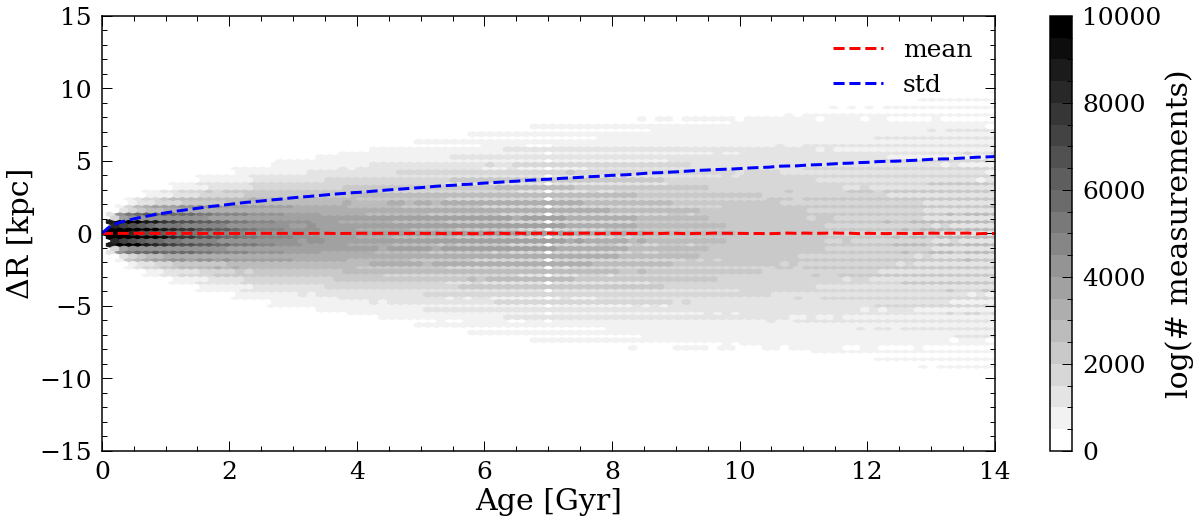

In [59]:

plt.figure(figsize=(20,8))
cmap = plt.cm.get_cmap('binary',20)
plt.hexbin(times, dRs, extent=(0,14,-15,15), gridsize=100, mincnt=10, cmap=cmap, vmin=0, 
           vmax=10000)
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')
plt.plot(τs, dRmeans, 'r--', label='mean', linewidth = 3)
plt.plot(τs, dRstds, 'b--', label='std', linewidth = 3)
plt.legend(loc=0)
cb = plt.colorbar()
cb.set_label('log(# measurements)')
plt.xlim(0, 14)
plt.ylim(-15, 15)




No handles with labels found to put in legend.
<ipython-input-70-7477e3b308d0>:31: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A*50/xf**2/100, 'b--',label='$DΔ^2/f^2/100$ (Brown noise, random walk)',linewidth=5)


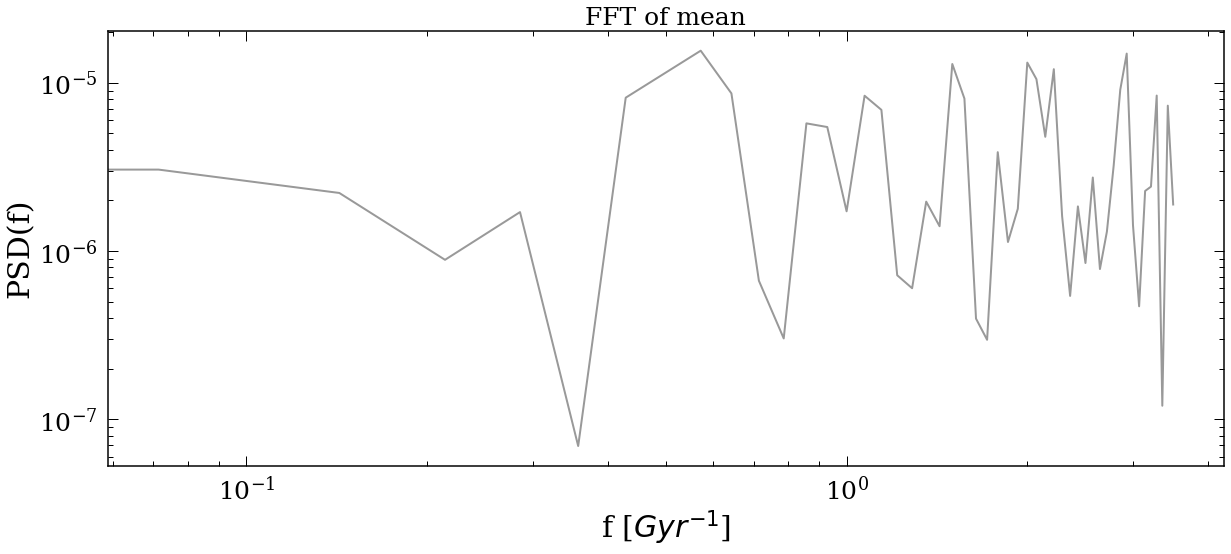

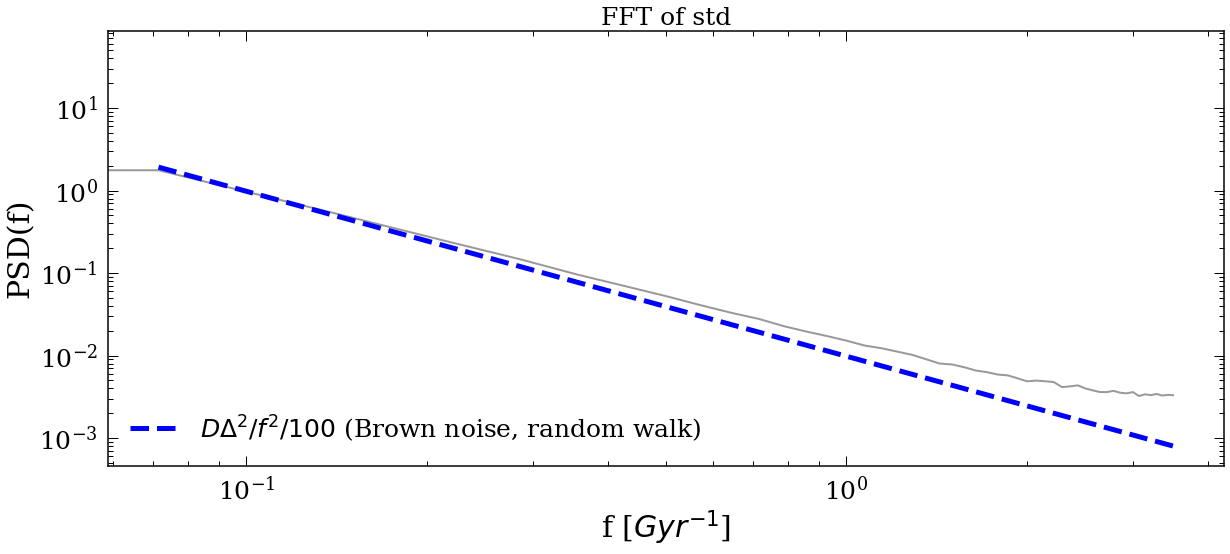

In [70]:
N = len(τs)
T = max(τs)/N
yf = fft(dRmeans)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD**2,'k-',alpha=0.4)
PSD_smooth = savgol_filter(PSD**2, 21, 1)
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.legend(loc=3)
plt.title('FFT of mean', fontsize=25)




N = len(τs)
T = max(τs)/N
yf = fft(dRstds)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD**2,'k-',alpha=0.4)
PSD_smooth = savgol_filter(PSD**2, 21, 1)
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.title('FFT of std', fontsize=25)
A = D*T**2
plt.plot(xf, A*50/xf**2/100, 'b--',label='$DΔ^2/f^2/100$ (Brown noise, random walk)',linewidth=5)
plt.legend(loc=3)

# only blurring

In [39]:
def r(ν, R0, e):
    return R0*(1-e**2)/(1+e*np.cos(ν))

# not sure what blurring is but assume it is also diffusion in eccentricity?
def σ(τ,D):
    return np.sqrt(τ)*np.sqrt(2*D)

def end_e(τ, D, N):
    N = int(N)
    mu, sigma = 0, σ(τ, D)
    e = np.random.normal(0, sigma, N)
    return e

def M_to_ν(M, e):
    return M+(2*e-0.25*e**3)*np.sin(M)+5/4*e**2*np.sin(2*M)+13/12*e**3*np.sin(3*M) # O(e^4) Tylor expansion

# generate random sets of mean anomolys
M = np.random.uniform(0, 1, int(N))*np.pi*2
D_blur = 0.001 # need to be <1/28 so end e<1

times_blur = np.zeros((tinv, int(N)))
dRs_blur = np.zeros((tinv, int(N)))

dRmeans_blur, dRstds_blur = np.zeros(tinv), np.zeros(tinv)
for i, t in enumerate(τs):
    es = end_e(t, D_blur, N)
    νs = M_to_ν(M, es) # get the true anomoly
    
    dRs_blur[i, :] = r(νs, R0, es)-R0 # get R-Rbirth
    
    times_blur[i, :] = t
    dRmeans_blur[i] = np.mean(dRs_blur[i, :])
    dRstds_blur[i] = np.std(dRs_blur[i, :])
    
dRs_blur, times_blur = dRs_blur.flatten(), times_blur.flatten()

(-3.0, 3.0)

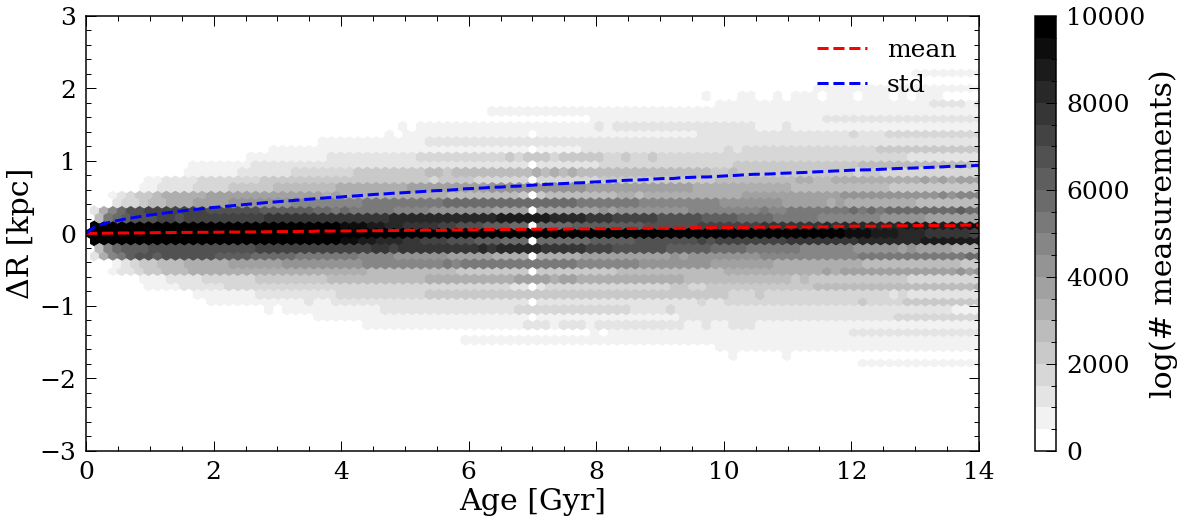

In [58]:

plt.figure(figsize=(20,8))
cmap = plt.cm.get_cmap('binary',20)
plt.hexbin(times_blur, dRs_blur, extent=(0,14,-6,6), gridsize=100, mincnt=10, cmap=cmap, vmin=0, 
           vmax=10000)
plt.xlabel('Age [Gyr]')
plt.ylabel('ΔR [kpc]')
plt.plot(τs, dRmeans_blur, 'r--', label='mean', linewidth = 3)
plt.plot(τs, dRstds_blur, 'b--', label='std', linewidth = 3)
plt.legend(loc=0)
cb = plt.colorbar()
cb.set_label('log(# measurements)')
plt.xlim(0, 14)
plt.ylim(-3, 3)



<ipython-input-76-123257c78e79>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A*50/xf**2/100, 'b--',label='$DΔ^2/f^2/100$ (Brown noise, random walk)',linewidth=5)
<ipython-input-76-123257c78e79>:33: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(xf, A*50/xf**2, 'b--',label='$DΔ^2/f^2$ (Brown noise, random walk)',linewidth=5)


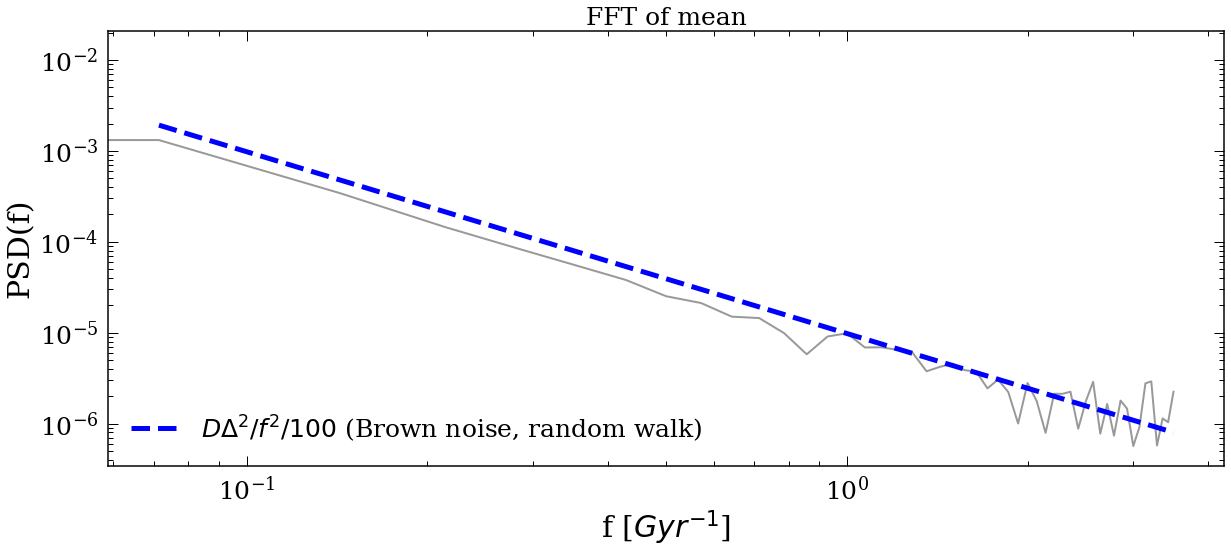

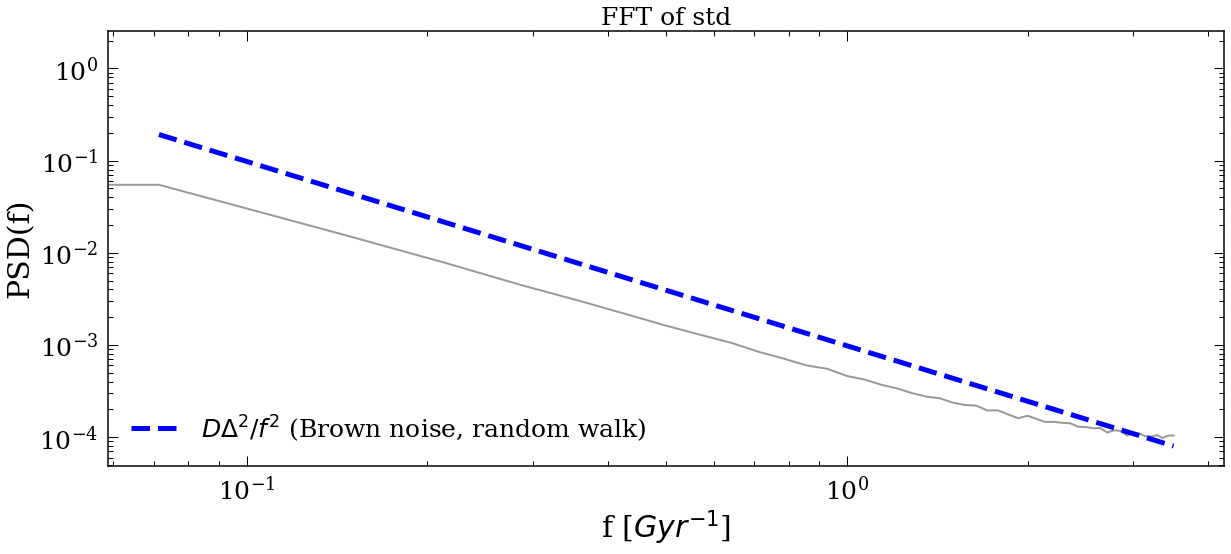

In [76]:
N = len(τs)
T = max(τs)/N
yf = fft(dRmeans_blur)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD**2,'k-',alpha=0.4)
PSD_smooth = savgol_filter(PSD**2, 21, 1)
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
A = D_blur*T**2
plt.plot(xf, A*50/xf**2/100, 'b--',label='$DΔ^2/f^2/100$ (Brown noise, random walk)',linewidth=5)
plt.legend(loc=3)
plt.title('FFT of mean', fontsize=25)




N = len(τs)
T = max(τs)/N
yf = fft(dRstds_blur)
xf = fftfreq(N, T)[:N//2]

plt.figure(figsize=(20,8))
PSD = 2.0/N * np.abs(yf[0:N//2])
plt.loglog(xf,PSD**2,'k-',alpha=0.4)
PSD_smooth = savgol_filter(PSD**2, 21, 1)
plt.xlabel('f [$Gyr^{-1}$]')
plt.ylabel('PSD(f)')
plt.title('FFT of std', fontsize=25)
A = D_blur*T**2
plt.plot(xf, A*50/xf**2, 'b--',label='$DΔ^2/f^2$ (Brown noise, random walk)',linewidth=5)
plt.legend(loc=3)